## Question Answering with a fine-tuned BERT on CoQA dataset

In [1]:
# !pip install transformer

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
coqa_json_data = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
coqa_json_data.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [4]:
coqa_json_data['data'][0]

{'source': 'wikipedia',
 'id': '3zotghdk5ibi9cex97fepx7jetpso7',
 'filename': 'Vatican_Library.txt',
 'story': 'The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. \n\nThe Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. \n\nIn March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to 

### Data cleaning

In [5]:
del coqa_json_data["version"]

In [6]:
cols = ["text","question","answer"]

# j = 1
comp_list = []
for index, row in coqa_json_data.iterrows():
    for i in range(len(row["data"]["questions"])):
        temp_list = []
#         temp_list.append(j)
        temp_list.append(row["data"]["story"])
        temp_list.append(row["data"]["questions"][i]["input_text"])
        temp_list.append(row["data"]["answers"][i]["input_text"])
        comp_list.append(temp_list)
#     j += 1
new_df = pd.DataFrame(comp_list, columns=cols) 

In [7]:
#Saving the data as csv
new_df.to_csv("CoQA_data.csv", index=False)

In [8]:
data = pd.read_csv("CoQA_data.csv")
data.head()

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


In [9]:
print("Number of question and answers: ", len(data))

Number of question and answers:  108647


### Building the chatbot

In [10]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
random_num = np.random.randint(0,len(data))

question = data["question"][random_num]
text = data["text"][random_num]

In [12]:
print(question, "\n", text)

What is the target audience for this? 
 The Exterminating Angel 

Director: Luis Bunuel 

Country/Date : Mexico/1962 (black and white) 

Introduction : A party is organized in a high class society house. Many people are drinking and eating. It's getting late, but nobody is leaving. Even though the door is open, people seem to be locked in the house. They can't leave either the day or on the following days. So a rescue began. 

The Net 

Director: Irwin Winkler 

Country/Date: U.S.A./1995 

Introduction: Angela Bennettt is a computer programmer who has devoted her life to computers and the Internet. She spends hours and hours in front of the screen. She does everything over the Internet, and she has some close friends in a chat room, though she has never talked to her neighbors. 

Kung Fu Panda 

Director : Mark Osborne & John Stevenson 

Country/Date : U.S.A./2008 

Introduction: The leading character is a panda whose name is Po. He is lazy first but he has a great dream----to be a kun

In [13]:
input_ids = tokenizer.encode(question, text)
print("The input has a total of {} tokens.".format(len(input_ids)))

The input has a total of 395 tokens.


In [14]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]        101
what       2,054
is         2,003
the        1,996
target     4,539
audience   4,378
for        2,005
this       2,023
?          1,029
[SEP]        102
the        1,996
ex         4,654
##ter      3,334
##minating  27,932
angel      4,850
director   2,472
:          1,024
luis       6,446
bun       21,122
##uel     16,284
country    2,406
/          1,013
date       3,058
:          1,024
mexico     3,290
/          1,013
1962       3,705
(          1,006
black      2,304
and        1,998
white      2,317
)          1,007
introduction   4,955
:          1,024
a          1,037
party      2,283
is         2,003
organized   4,114
in         1,999
a          1,037
high       2,152
class      2,465
society    2,554
house      2,160
.          1,012
many       2,116
people     2,111
are        2,024
drinking   5,948
and        1,998
eating     5,983
.          1,012
it         2,009
'          1,005
s          1,055
getting    2,893
late       2,397
,          1,010
but    

In [15]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

9
10
385
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
#print(output.start_logits, output.end_logits)

In [17]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
#print(answer_start, answer_end)

In [18]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
The exterminating angel 

director: luis bunuel 

country/date : mexico/1962 (black and white) 

introduction : a party is organized in a high class society house. many people are drinking and eating. it's getting late, but nobody is leaving. even though the door is open, people seem to be locked in the house. they can't leave either the day or on the following days. so a rescue began. 

the net 

director: irwin winkler 

country/date: u.s.a./1995 

introduction: angela bennettt is a computer programmer who has devoted her life to computers and the internet. she spends hours and hours in front of the screen. she does everything over the internet, and she has some close friends in a chat room, though she has never talked to her neighbors. 

kung fu panda 

director : mark osborne & john stevenson 

country/date : u.s.a./2008 

introduction: the leading character is a panda whose name is po. he is lazy first but he has a great dream----to be a kung fu master. to make his dream com

### Visualization of the tokens

In [19]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [20]:
print(len(token_labels))

395


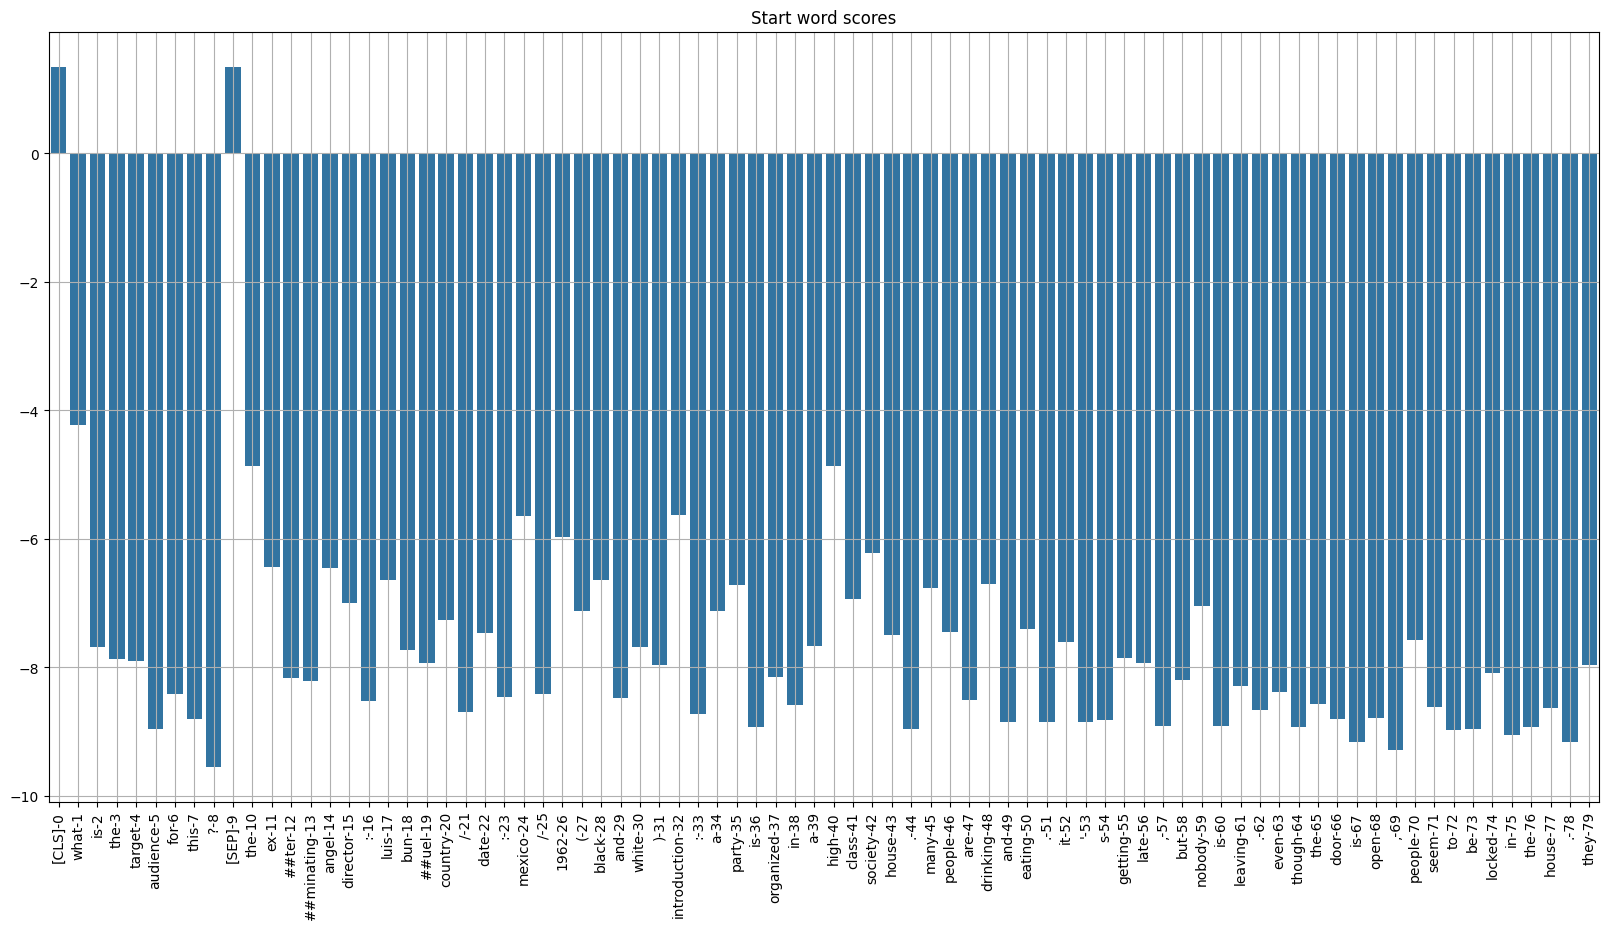

In [21]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], errorbar=('ci', None))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.tick_params(axis='x', labelrotation = 90)
ax.grid(True)
plt.title("Start word scores")
plt.show()

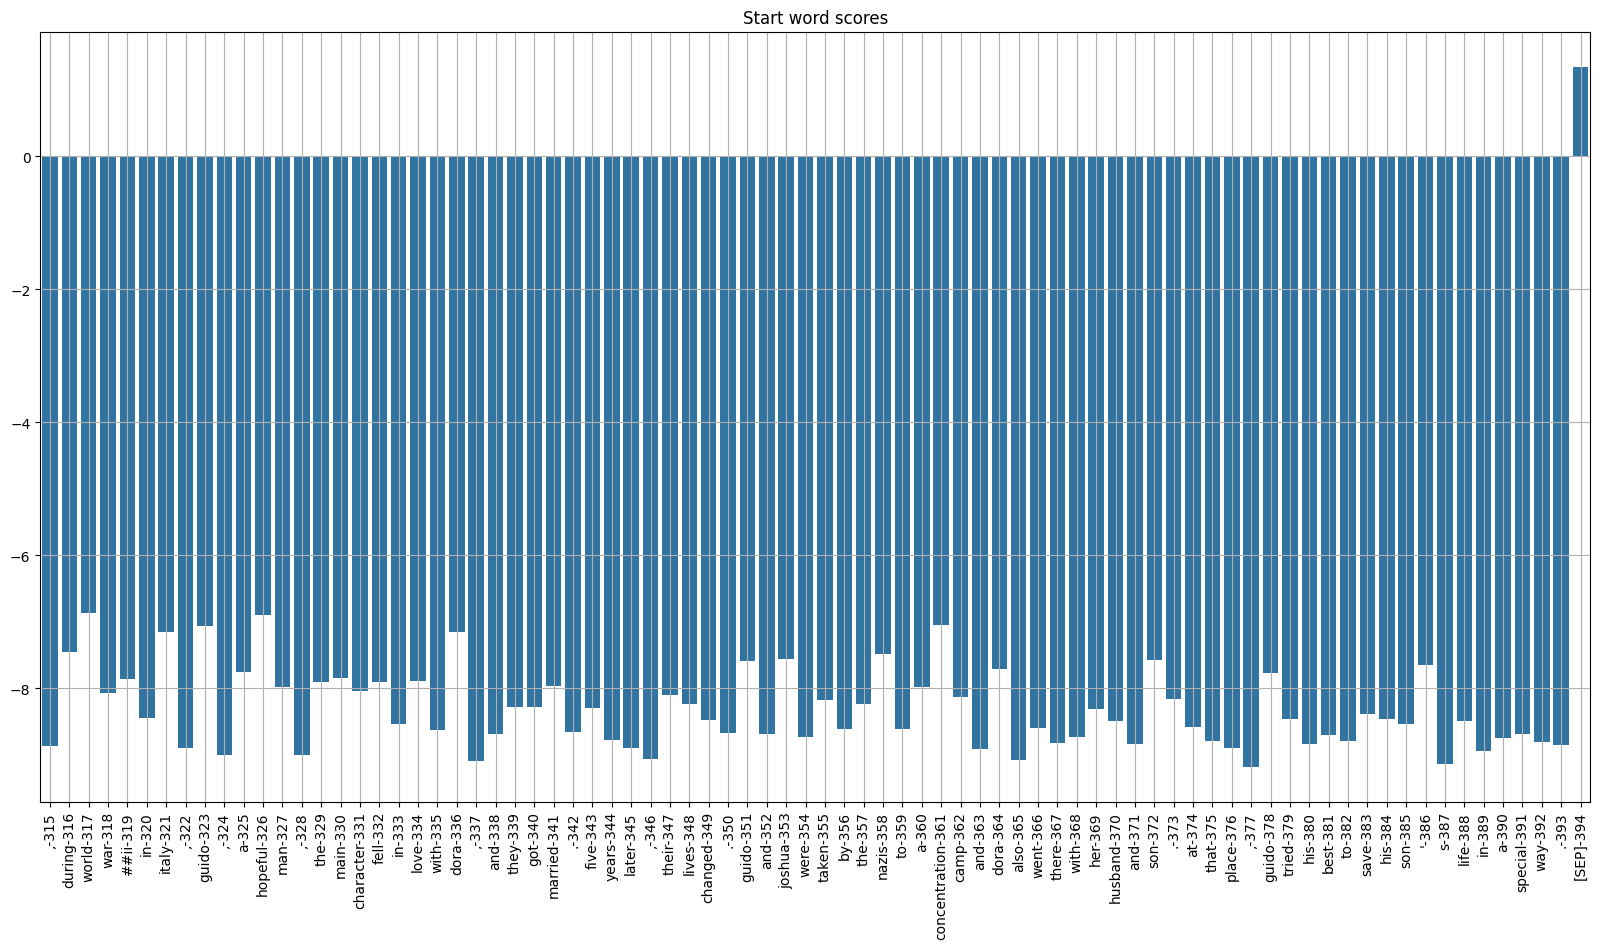

In [22]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], errorbar=('ci', None))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",)
ax.tick_params(axis='x', labelrotation = 90)
ax.grid(True)
plt.title("Start word scores")
plt.show()

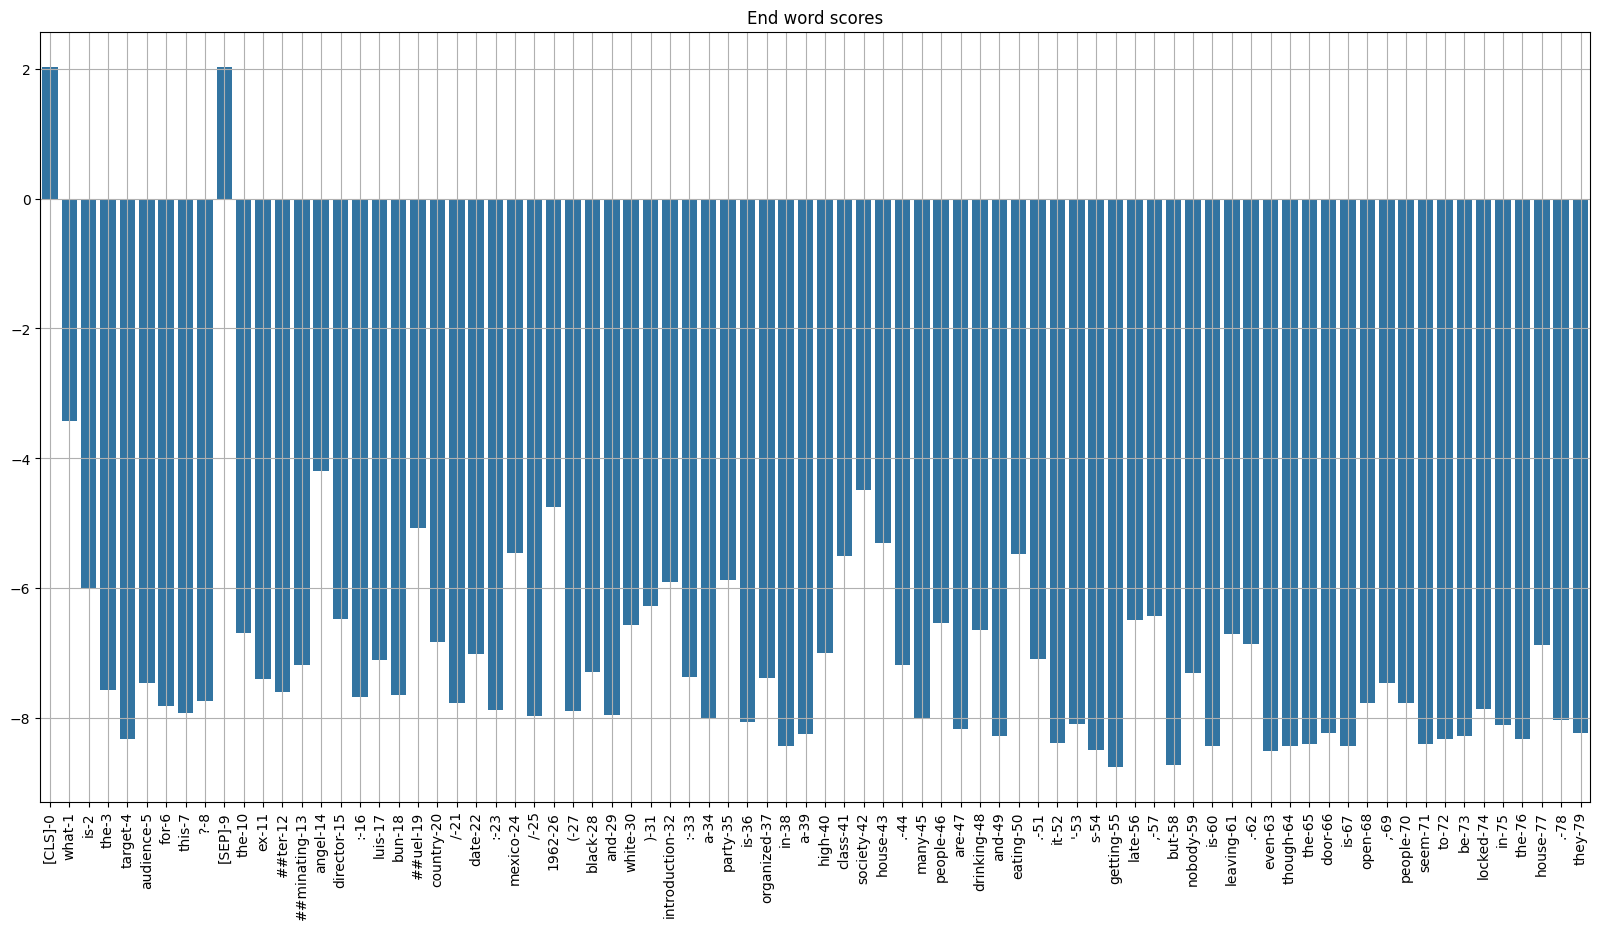

In [23]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=end_scores[:80],errorbar=('ci',None))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.tick_params(axis='x', labelrotation = 90)
ax.grid(True)
plt.title("End word scores")
plt.show()

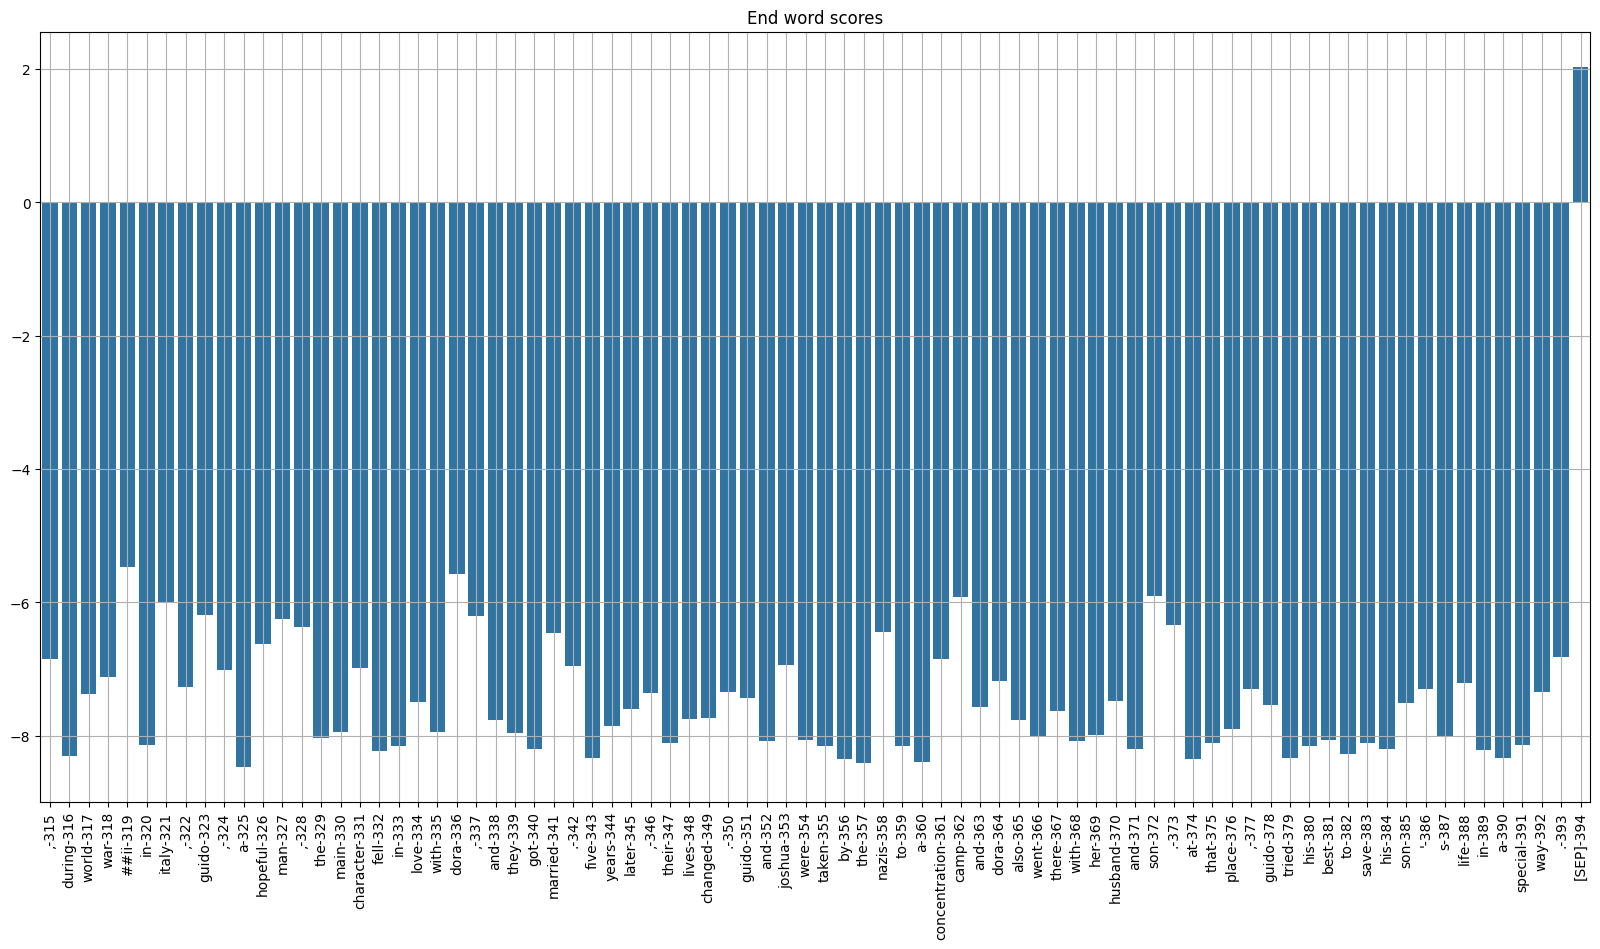

In [24]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.tick_params(axis='x', labelrotation = 90)
ax.grid(True)
plt.title("End word scores")
plt.show()

### Code to join the broken words

In [25]:
answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

### Function

In [26]:
def question_answer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
#     print("Text:\n{}".format(text.capitalize()))
#     print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}".format(answer.capitalize()))

In [27]:
text = """New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star's famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. Profits from the auction at the Hard Rock Cafe in New York's Times Square crushed pre-sale expectations of only $120,000 in sales. The highly prized memorabilia, which included items spanning the many stages of Jackson's career, came from more than 30 fans, associates and family members, who contacted Julien's Auctions to sell their gifts and mementos of the singer. Jackson's flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during \"Motown 25,\" an NBC special where he debuted his revolutionary moonwalk. Fellow Motown star Walter \"Clyde\" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson's autograph at the time, but Jackson gave him the glove instead. "The legacy that [Jackson] left behind is bigger than life for me,\" Orange said. \"I hope that through that glove people can see what he was trying to say in his music and what he said in his music.\" Orange said he plans to give a portion of the proceeds to charity. Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau, paid a 25 percent buyer's premium, which was tacked onto all final sales over $50,000. Winners of items less than $50,000 paid a 20 percent premium."""
question = "Where was the Auction held?"

question_answer(question, text)


Answer:
Hard rock cafe in new york ' s times square


In [28]:
print("Original answer:\n", data.loc[data["question"] == question]["answer"].values[0])

Original answer:
 Hard Rock Cafe


### Playing with the chatbot

In [32]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask another question based on this text (Y/N)? ")
        if response[0] == "y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "n":
            print("\nBye!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
 Once there was a beautiful fish named Asta. Asta lived in the ocean. There were lots of other fish in the ocean where Asta lived. They played all day long. One day, a bottle floated by over the heads of Asta and his friends. They looked up and saw the bottle.  What is it? said Asta's friend Sharkie. It looks like a bird's belly,said Asta. But when they swam closer, it was not a bird's belly.  It was hard and clear, and there was something inside it. The bottle floated above them. They wanted to open it.  They wanted to see what was inside. So they caught the bottle and carried it down to the bottom of the ocean.  They cracked it open on a rock. When they got it open, they found what was inside. It was a note. The note was written in orange crayon on white paper. Asta could not read the note.  Sharkie could not read the note. They took the note to Asta's papa. What does it say? they asked. Asta's papa read the note. He told Asta and Sharkie, This note is from a


Answer:
Asta



Do you want to ask another question based on this text (Y/N)?  y

Please enter your question: 
 What looked like a birds belly?



Answer:
A bottle



Do you want to ask another question based on this text (Y/N)?  y

Please enter your question: 
 who said that?



Answer:
Asta ' s friend sharkie



Do you want to ask another question based on this text (Y/N)?  y

Please enter your question: 
 What did they do with the note?



Answer:
Find another bottle so we can send it to her



Do you want to ask another question based on this text (Y/N)?  n



Bye!


In [31]:
# Once there was a beautiful fish named Asta. Asta lived in the ocean. There were lots of other fish in the ocean where Asta lived. They played all day long. One day, a bottle floated by over the heads of Asta and his friends. They looked up and saw the bottle. 
# What is it? said Asta's friend Sharkie. It looks like a bird's belly,said Asta. But when they swam closer, it was not a bird's belly. 
# It was hard and clear, and there was something inside it. The bottle floated above them. They wanted to open it. 
# They wanted to see what was inside. So they caught the bottle and carried it down to the bottom of the ocean. 
# They cracked it open on a rock. When they got it open, they found what was inside.
# It was a note. The note was written in orange crayon on white paper. Asta could not read the note. 
# Sharkie could not read the note. They took the note to Asta's papa. What does it say? they asked.
# Asta's papa read the note. He told Asta and Sharkie, This note is from a little girl. She wants to be your friend. 
# If you want to be her friend, we can write a note to her. But you have to find another bottle so we can send it to her.
# And that is what they did.